## **Advanced NLP Techniques (NER, Sentiment Analysis)**

## **1. Import Libraries**

In [13]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import pandas as pd
import re

## **2. Download NLTK Packages**

In [14]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## **3. Load Text for NER Example**

In [15]:
text = """The US President Joe Biden met with British Prime Minister Boris Johnson in London.
Apple Inc. is looking to open a new office in San Francisco."""
print(text)

The US President Joe Biden met with British Prime Minister Boris Johnson in London. 
Apple Inc. is looking to open a new office in San Francisco.


## **4. Tokenization for NER**

In [16]:
tokenized_sentences = sent_tokenize(text)
tokenized_words = [word_tokenize(sentence) for sentence in tokenized_sentences]
print(tokenized_words)

[['The', 'US', 'President', 'Joe', 'Biden', 'met', 'with', 'British', 'Prime', 'Minister', 'Boris', 'Johnson', 'in', 'London', '.'], ['Apple', 'Inc.', 'is', 'looking', 'to', 'open', 'a', 'new', 'office', 'in', 'San', 'Francisco', '.']]


## **5. POS Tagging**

In [17]:
pos_tagged_words = [pos_tag(words) for words in tokenized_words]
print(pos_tagged_words)

[[('The', 'DT'), ('US', 'NNP'), ('President', 'NNP'), ('Joe', 'NNP'), ('Biden', 'NNP'), ('met', 'VBD'), ('with', 'IN'), ('British', 'NNP'), ('Prime', 'NNP'), ('Minister', 'NNP'), ('Boris', 'NNP'), ('Johnson', 'NNP'), ('in', 'IN'), ('London', 'NNP'), ('.', '.')], [('Apple', 'NNP'), ('Inc.', 'NNP'), ('is', 'VBZ'), ('looking', 'VBG'), ('to', 'TO'), ('open', 'VB'), ('a', 'DT'), ('new', 'JJ'), ('office', 'NN'), ('in', 'IN'), ('San', 'NNP'), ('Francisco', 'NNP'), ('.', '.')]]


## **6. Named Entity Recognition (NER)**

In [18]:
named_entities = [ne_chunk(tagged_words) for tagged_words in pos_tagged_words]
for entity in named_entities:
    print(entity)

(S
  The/DT
  (ORGANIZATION US/NNP)
  President/NNP
  (PERSON Joe/NNP Biden/NNP)
  met/VBD
  with/IN
  (GPE British/NNP)
  Prime/NNP
  Minister/NNP
  (PERSON Boris/NNP Johnson/NNP)
  in/IN
  (GPE London/NNP)
  ./.)
(S
  (PERSON Apple/NNP)
  (ORGANIZATION Inc./NNP)
  is/VBZ
  looking/VBG
  to/TO
  open/VB
  a/DT
  new/JJ
  office/NN
  in/IN
  (GPE San/NNP Francisco/NNP)
  ./.)


## **7. Load Text Data for Sentiment Analysis**

In [19]:
sentences = ["I love the new design of the iPhone.",
             "The recent update on the software is terrible.",
             "The movie was amazing!"]
print(sentences)

['I love the new design of the iPhone.', 'The recent update on the software is terrible.', 'The movie was amazing!']


## **8. Preprocessing for Sentiment Analysis**

In [20]:
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

processed_sentences = [preprocess_text(sentence) for sentence in sentences]
print(processed_sentences)

['i love the new design of the iphone', 'the recent update on the software is terrible', 'the movie was amazing']


## **9. Sentiment Analysis using VADER**

In [21]:
sia = SentimentIntensityAnalyzer()
sentiment_scores = [sia.polarity_scores(sentence) for sentence in processed_sentences]

for i, sentence in enumerate(processed_sentences):
    print(f"Sentence: {sentence}")
    print(f"Sentiment Score: {sentiment_scores[i]}")

Sentence: i love the new design of the iphone
Sentiment Score: {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}
Sentence: the recent update on the software is terrible
Sentiment Score: {'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'compound': -0.4767}
Sentence: the movie was amazing
Sentiment Score: {'neg': 0.0, 'neu': 0.441, 'pos': 0.559, 'compound': 0.5859}


## **10. Visualize Sentiment Analysis Results**

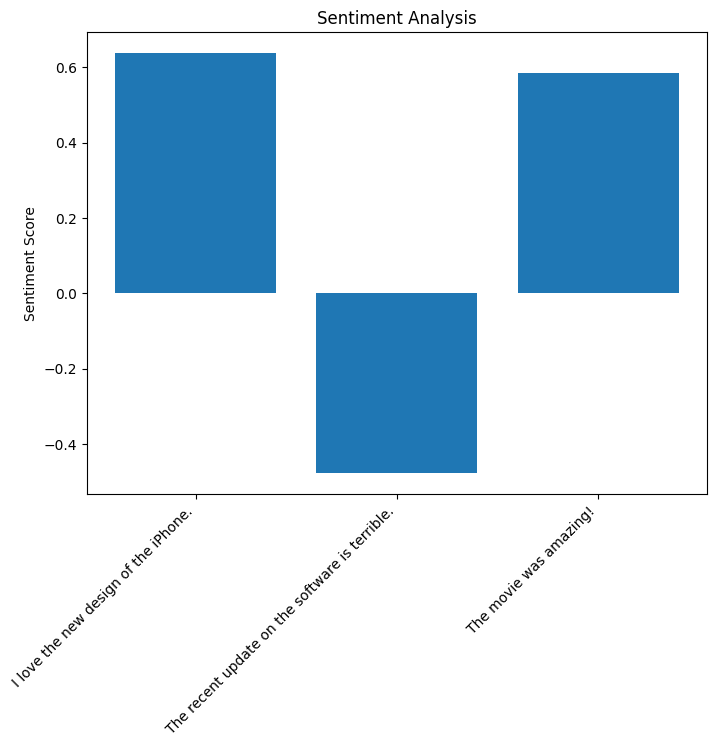

In [22]:
sentiment_df = pd.DataFrame(sentiment_scores)
sentiment_df['Sentence'] = sentences

plt.figure(figsize=(8, 6))
plt.bar(sentiment_df['Sentence'], sentiment_df['compound'])
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis')
plt.xticks(rotation=45, ha='right')
plt.show()